# This notebook is code to accompany article Grimm’s Tales Topic Analysis via LDA: Why some Tales are Famous

Article: https://towardsdatascience.com/grimms-tales-topic-analysis-via-lda-why-some-tales-are-famous-163ee90013b5?sk=87b19c6afe8d5557cee7e49cdb4a8a79

Dataset: https://www.kaggle.com/cornellius/grimms-brother-fairy-tale-dataset

In [1]:
df = pd.read_excel('grimms_tale.xlsx')

In [2]:
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import requests

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Title   216 non-null    object 
 1   Story   216 non-null    object 
 2   Rating  216 non-null    float64
 3   Voters  216 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.9+ KB


In [35]:
from nltk.corpus import stopwords
import string
stopword = list(set(stopwords.words('english')))
stopword.extend(['said', 'will', 'thou', 'did', 'went'])
nopunc = ''.join([char.lower() for char in df['Story'].loc[0] if char not in string.punctuation])
clean_mess = ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [37]:
def word_clean(x):
    nopunc = ''.join([char.lower() for char in x if char not in string.punctuation])
    clean_mess = ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])
    return clean_mess

In [38]:
df['Story_processed'] = df['Story'].apply(word_clean)

In [39]:
df

,Title,Story,Rating,Voters,Story_processed,topic
0,The frog king or Iron Henry,"In the old times, when it was still of some us...",8.3,2017,old times still use wish thing one wanted live...,0
1,Cat and mouse in partnership,"A cat had made the acquaintance of a mouse, an...",8.7,1166,cat made acquaintance mouse said much great lo...,0
2,Our Lady's Child,Hard by a great forest dwelt a wood-cutter wit...,8.7,528,hard great forest dwelt woodcutter wife child ...,1
3,The story of the youth who went forth to learn...,"A certain father had two sons, the elder of wh...",8.5,536,certain father two sons elder smart sensible c...,1
4,The wolf and the seven young kids,There was once an old goat who had seven littl...,8.5,1811,old goat seven little ones fond ever mother ch...,1
...,...,...,...,...,...,...
211,Puss in Boots,"A miller had three sons, his mill, a donkey an...",8.8,518,miller three sons mill donkey tom cat sons gri...,0
212,The hand with the knife,There once lived a girl who had three brothers...,8.2,20,lived girl three brothers boys meant everythin...,1
213,How children played slaughter with each other,"I\n\nIn a city named Franecker, located in Wes...",9.2,79,city named franecker located west friesland yo...,1
214,Death and the goose herder,A poor herder went along the shore of a large ...,8.4,8,poor herder went along shore large stormy wate...,1


In [40]:
import stylecloud
# stylecloud.gen_stylecloud(red, icon_name= "fab fa-wolf-pack-battalion", output_name = 'red.png')

In [41]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [45]:
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 4), min_df = 5, max_df = 0.8 )
idf = TfidfTransformer()
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['Story_processed'])
ti_data =idf.fit_transform(count_data)

In [48]:
count_vectorizer.get_feature_names()

['able',
 'abundance',
 'accept',
 'accompanied',
 'accomplished',
 'accord',
 'according',
 'account',
 'accused',
 'act',
 'added',
 'advice',
 'afar',
 'affair',
 'afraid',
 'afternoon',
 'age',
 'aged',
 'aged king',
 'ago',
 'agreed',
 'ah',
 'ah dear',
 'ah replied',
 'ah said',
 'aha',
 'ails',
 'aim',
 'aimed',
 'air',
 'alarmed',
 'alas',
 'alas answered',
 'alas said',
 'alighted',
 'alike',
 'alive',
 'allow',
 'allowed',
 'alms',
 'aloud',
 'altar',
 'amazed',
 'amazement',
 'amiss',
 'anew',
 'angel',
 'angels',
 'anger',
 'angrily',
 'angry',
 'angry ordered',
 'angry said',
 'animal',
 'animals',
 'announced',
 'answer',
 'answer said',
 'answered',
 'answered fox',
 'answered king',
 'answered know',
 'answered man',
 'answered old',
 'answered tell',
 'answered thou',
 'anxiety',
 'anxious',
 'apart',
 'apartment',
 'apparel',
 'appear',
 'appeared',
 'appeared said',
 'appeased',
 'apple',
 'apples',
 'appointed',
 'apprentice',
 'approached',
 'apron',
 'arm',
 'arms

In [49]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.model_selection import GridSearchCV

# Define Search Param
search_params = {'n_components': [2, 3, 4, 5, 6,7,8,9,10, 15, 20, 25]}

# Init the model
lda = LDA()

# Init Grid Search class
model = GridSearchCV(lda, search_params)

model.fit(count_data)
best_lda_model = model.best_estimator_


In [50]:
print("Best model's params: ", model.best_params_)
print("Best log likelihood score: ", model.best_score_)
print("Model perplexity: ", best_lda_model.perplexity(count_data))

Best model's params:  {'n_components': 2}
Best log likelihood score:  -156408.32774592508
Model perplexity:  1495.65471760992


In [12]:
lda_output = best_lda_model.transform(count_data)

# create a dataframe

df['topic'] = np.argmax(pd.DataFrame(np.round(lda_output,2)).values, axis=1)


<Figure size 576x576 with 0 Axes>

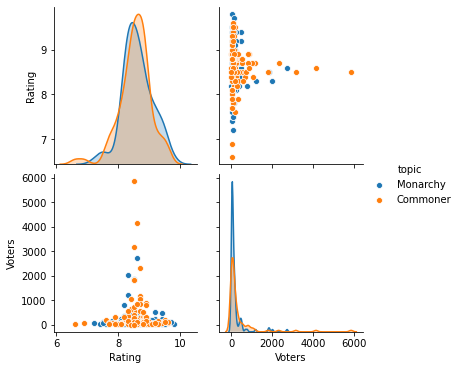

In [88]:
plt.figure(figsize= (8,8))
sns.pairplot(data = df,hue = 'topic')


In [84]:
df.groupby('topic').mean()

,Rating,Voters
topic,,
Commoner,8.552688,390.666667
Monarchy,8.626016,207.325203


In [91]:
df[df['Voters']>1000]

,Title,Story,Rating,Voters,Story_processed,topic
0,The frog king or Iron Henry,"In the old times, when it was still of some us...",8.3,2017,old times still use wish thing one wanted live...,Monarchy
1,Cat and mouse in partnership,"A cat had made the acquaintance of a mouse, an...",8.7,1166,cat made acquaintance mouse said much great lo...,Commoner
4,The wolf and the seven young kids,There was once an old goat who had seven littl...,8.5,1811,old goat seven little ones fond ever mother ch...,Commoner
11,Rapunzel,"There once lived a man and his wife, who had l...",8.6,2727,lived man wife long wished child vain back hou...,Monarchy
14,Hansel and Gretel,Near a great forest there lived a poor woodcut...,8.6,4135,near great forest lived poor woodcutter wife t...,Commoner
15,The three snake-leaves,"There was once on a time a poor man, who could...",8.3,1194,time poor man could longer support son said so...,Monarchy
20,Cinderella,"There was once a rich man whose wife lay sick,...",8.5,3152,rich man whose wife lay sick felt end drawing ...,Commoner
23,Mother Hulda,A widow had two daughters; one was pretty and ...,8.4,1044,widow two daughters one pretty industrious ugl...,Commoner
25,Little Red Riding Hood,Once upon a time there was a sweet little girl...,8.5,5844,upon time sweet little girl everyone saw liked...,Commoner
26,The Bremen town musicians,There was once an ass whose master had made hi...,8.7,1031,ass whose master made carry sacks mill many lo...,Commoner


In [14]:
feat = count_vectorizer.get_feature_names()

In [58]:
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics =2
number_words = 50

# # Create and fit the LDA model
# lda = LDA(n_components=number_topics, n_jobs=-1)
# lda.fit(ti_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(best_lda_model, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
thou king thee little old away took thy saw come great kings man daughter long woman thought son let father hast shall answered day art asked gave maiden night cried forest good home like looked fell eyes brought child heard old woman know got brother door beautiful castle quite heart head

Topic #1:
little man king hans wife home away good took answered father shall cried way saw thought mother come house got great day let asked peasant oh gave door began long water told quite woman like know wood make gold bed tree ran daughter going set horse cat bird old soon


In [59]:
lda_output = best_lda_model .transform(count_data)

# create a dataframe

df['topic'] = np.argmax(pd.DataFrame(np.round(lda_output,2)).values, axis=1)


In [60]:
df['topic'] = df['topic'].apply(lambda x: 'Monarchy' if x == 0 else 'Commoner')

In [74]:
df.head()

,Title,Story,Rating,Voters,Story_processed,topic
0,The frog king or Iron Henry,"In the old times, when it was still of some us...",8.3,2017,old times still use wish thing one wanted live...,Monarchy
1,Cat and mouse in partnership,"A cat had made the acquaintance of a mouse, an...",8.7,1166,cat made acquaintance mouse said much great lo...,Commoner
2,Our Lady's Child,Hard by a great forest dwelt a wood-cutter wit...,8.7,528,hard great forest dwelt woodcutter wife child ...,Monarchy
3,The story of the youth who went forth to learn...,"A certain father had two sons, the elder of wh...",8.5,536,certain father two sons elder smart sensible c...,Monarchy
4,The wolf and the seven young kids,There was once an old goat who had seven littl...,8.5,1811,old goat seven little ones fond ever mother ch...,Commoner


In [81]:
df[df['topic'] == 'Commoner']['Title'].sample(20)

166                              Strong Hans
26                 The Bremen town musicians
17                     Straw, coal, and bean
137                Knoist and his three sons
20                                Cinderella
23                              Mother Hulda
33                               Clever Else
36                                 Tom Thumb
151                 The twelve idle servants
82                              Hans in luck
56                           The golden bird
119                    The three apprentices
28     The devil with the three golden hairs
89                           The young giant
67                  The thief and his master
97                           Doctor Know-all
38                                 The elves
37                   The wedding of Mrs. Fox
39                     The robber bridegroom
43                           Godfather Death
Name: Title, dtype: object

In [ ]:
sns.scatterplot(data = df, x  = 'Rating', y = 'Voters', hue = 'topic', palette = 'rainbow')

In [53]:
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis

In [54]:
LDAvis_prepared = sklearn_lda.prepare(best_lda_model, count_data, count_vectorizer)

In [55]:
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(2) +'.html')